In [2]:
import matplotlib.image as mpimg;import matplotlib.pyplot as plt
import numpy as np;import pickle;import sys as s;import random as rd
import torch;import torch.nn as nn;import torch.optim as optim
from pandas_ods_reader import read_ods
import sys as s

In [3]:
y=[]
df = read_ods('data2.ods', headers=False)
colunas = df.columns
#print(colunas)
Y=[]
for i in colunas:
    #for j in range(0,70):#df[i]:
    for j in df[i]:
        #print(df[i][j])
        if j!=0.0:
            y.append(j)
            #a+=1
        else:
            break
    Y.append(y)
    y=[]
    print(np.shape(Y))
            #else:
        #    print('nao')
#print(df['column.0'])

(1, 70)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(12,)
(13,)
(14,)
(15,)
(16,)
(17,)
(18,)
(19,)
(20,)
(21,)
(22,)
(23,)
(24,)
(25,)
(26,)
(27,)
(28,)
(29,)
(30,)
(31,)
(32,)
(33,)
(34,)
(35,)
(36,)
(37,)
(38,)
(39,)
(40,)
(41,)
(42,)
(43,)
(44,)
(45,)


/home/v/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [4]:
def Get_Dataset_real():# Esse é o nome da função.
    y=[]
    df = read_ods('data2.ods', headers=False)
    colunas = df.columns
    #print(colunas)
    Y=[]
    for i in colunas:
    #for j in range(0,70):#df[i]:
        for j in df[i]:
            #print(df[i][j])
            if j!=0.0:
                y.append(j)
            #a+=1
            else:
                break
        Y.append(y)
        y=[]
    print(np.shape(Y))

    address = open("Y_train","wb");    pickle.dump(Y, address);    address.close()
    return Y
Y=Get_Dataset_real()

(45,)


70


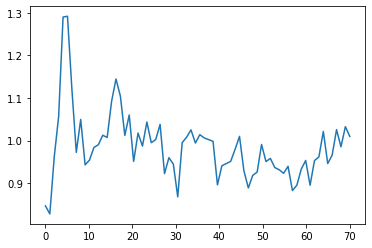

In [5]:
index=rd.randint(0,np.shape(Y)[0])
y=1*Y[index]
#y=1*Y[43]
print(len(y))
x=np.linspace(0,len(y),len(y))
plt.plot(x,y)
plt.show()

# 13/04/2022 parei aqui


## Gera o dataset_1.0

O dataset é composto de $$part_1=[y_1,..,y_{30}]$$ with dimension $d/2$ and $$label_1=[0].$$ For the initial part of the graph. Now for the second part of the graph we have $$part_2=[y_{d-30},...,y_d]$$ with dimension $d/2$ and with $$label_2=[1].$$

In [6]:
print(np.shape(Y))
for i in Y: 
    print(len(i))
    break

(45,)
70


/home/v/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [7]:
''' Gera o dataset
        O dataset é composto de $part_1=[y_0,..,y_{d/2}]$ with dimension $d/2$ and $label_1=[0]$ For the initial part of the graph.
        For the second part of the graph we have $part_2=[y_{d/2},...,y_d]$ with dimension $d/2$ and with $label_2=[1]$.
'''
def gen_dataset():
    Input=[]
    Output=[]
    Input_test=[]
    Output_test=[]
    j=0
    for i in Y:
        if j<10:
            y1 = i[0:30]
            Input.append(y1)
            Output.append(0)
            y2 = i[len(i)-30:len(i)]
            Input.append(y2)
            Output.append(1)
            j+=1
        else:
            y1 = i[0:30]
            Input_test.append(y1)
            Output_test.append(0)
            y2 = i[len(i)-30:len(i)]
            Input_test.append(y2)
            Output_test.append(1)
    #---------------------- Salva o dataset com os 80 exemplos, ordenado em 4 grupos de 20
    print(np.shape(Input))
    print(np.shape(Output))
    print(np.shape(Input_test))
    print(np.shape(Output_test))
    #s.exit()
    Input=np.reshape(Input,(2,10,30))
    Output=np.reshape(Output,(2,10,1))
    Input=torch.as_tensor(Input)
    Output=torch.as_tensor(Output)
    address = open("Input_Train","wb");    pickle.dump(Input, address);    address.close()
    address = open("Train_Labels","wb");    pickle.dump(Output, address);    address.close()
    print("Input_Train",np.shape(Input))
    print("Train_Labels",np.shape(Output))

    #---------------------- Salva o dataset com os 8 exemplos, ordenado em 4 grupos de 2
    Input_test=np.reshape(Input_test,(7,10,30))
    Output_test=np.reshape(Output_test,(7,10,1))
    Input_test=torch.as_tensor(Input_test)
    Output_test=torch.as_tensor(Output_test)
    address = open("Input_test","wb");    pickle.dump(Input_test, address);    address.close()
    address = open("test_Labels","wb");    pickle.dump(Output_test, address);    address.close()
    print("Input_test",np.shape(Input_test))
    print("test_Labels",np.shape(Output_test))
    return Input,Output,Input_test,Output_test
Input,Output,Input_test,Output_test=gen_dataset()

(20, 30)
(20,)
(70, 30)
(70,)
Input_Train torch.Size([2, 10, 30])
Train_Labels torch.Size([2, 10, 1])
Input_test torch.Size([7, 10, 30])
test_Labels torch.Size([7, 10, 1])


In [8]:
n_examples=np.shape(Input)[2]
print(n_examples)

30


In [103]:
#------------------DEFINE O MODELO----------------------------------------------
#-------------------------------------------------------------------------------
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(n_examples,720),
            nn.ReLU(),
            nn.Linear(720,1500),
            nn.ReLU(),
            nn.Linear(1500,2000),
            nn.ReLU(),
            nn.Linear(2000,500),
            nn.ReLU(),
            nn.Linear(500,50),
            nn.ReLU(),
            nn.Linear(50,1),
            #nn.Softmax()# Verificar a utilização da Softmax
        )
    def forward(self, x):
        encoded = self.encoder(x)
#        print(np.shape(encoded))
#        print(np.shape(aux))
        #decoded = self.decoder(encoded)
        return encoded

In [104]:
#------------------CHAMA O MODELO E INICIA CAMADAS DE PESOS ORTOGONAIS----------
#-------------------------------------------------------------------------------
model = Autoencoder()
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()# Utilizar essa função
print(type(criterion))
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4,weight_decay = 1e-5)
#optimizer = torch.optim.SGD(model.parameters(),lr=1e-4,weight_decay = 1e-5)#,momentum=0.5)

<class 'torch.nn.modules.loss.MSELoss'>


In [105]:
import timeit
def treine(epochs):
    inp = pickle.load( open( "Input_Train", "rb" ) )
    out =  pickle.load( open( "Train_Labels", "rb" ) )
    n_batch=np.shape(inp)[0]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            O=inp[batch_idx]
            A=out[batch_idx]
            O=O.float()
            A=A.float()
            recon = model(O)
            loss = torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
start = timeit.default_timer()
treine(3)
end = timeit.default_timer()
print('tempo = ',end-start)
#'''1000 épocas leva 9 min approx'''

Epoch:1,Loss:0.2363
Epoch:2,Loss:0.2327
Epoch:3,Loss:0.2321
tempo =  1.1334611519996542


In [77]:
#-------------------------------------------------------------------------------
#------TREINO DA IA-------------------------------------------------------------
#-------------------------------------------------------------------------------
def treine(epochs):
    inp = pickle.load( open( "Input_Train", "rb" ) )
    out =  pickle.load( open( "Train_Labels", "rb" ) )
    n_batch=np.shape(inp)[0]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            O=inp[batch_idx]
            A=out[batch_idx]
            O=O.float()
            A=A.float()
            recon = model(O)
            loss=torch.mean((recon-A)**2)# verificar se usar o pow(mtx,potencia) é igual ao **2
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
treine(3)
'''1000 épocas leva 9 min approx'''

Epoch:1,Loss:0.2365
Epoch:2,Loss:0.2351
Epoch:3,Loss:0.2338


'1000 épocas leva 9 min approx'

In [79]:
#PATH_save='new_data_state_model.pt'
#torch.save(model.state_dict(), PATH_save)
PATH_load='new_data_state_model_FULL.pt'
model.load_state_dict(torch.load(PATH_load))

<All keys matched successfully>

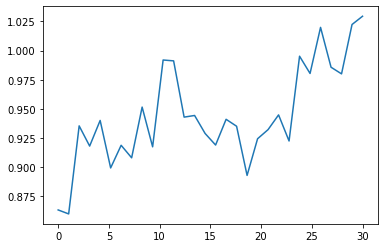

resposta =  tensor([0.9971], grad_fn=<SelectBackward0>)
label =  tensor([1.])


In [43]:
def random_predict():
    inp = pickle.load( open( "Input_Train", "rb" ) )
    a=np.shape(inp)[0]-1
    b=np.shape(inp)[1]-1
    a_idx=rd.randint(0,a)
    b_idx=rd.randint(0,b)
    out =  pickle.load( open( "Train_Labels", "rb" ) )
    O=inp[a_idx]
    y=1*O[b_idx]
    x=np.linspace(0,len(y),len(y))
    plt.plot(x,y)
    plt.show()  
    A=out[a_idx]
    O=O.float()
    A=A.float()
    resposta = model(O)
    print('resposta = ',resposta[b_idx])
    print('label = ',A[b_idx])
random_predict()

* Label = 0 (primeira parte do gráfico)
* Label = 1 (segunda parte do gráfico)
* Se a resposta for 0 quer dizer que a rede acha que o gráfico que foi apresentado é um gráfico do inicio.
* Se a resposta for 1, a rede acha que é da segunda parte.


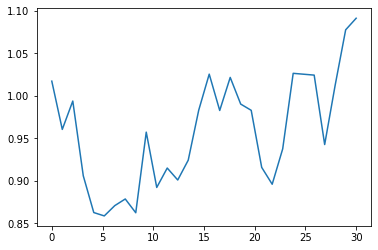

resposta =  tensor([0.0700], grad_fn=<SelectBackward0>)
label =  tensor([0.])


In [44]:
def predict_test():
    inp = pickle.load( open( "Input_test", "rb" ) )
    a=np.shape(inp)[0]-1
    b=np.shape(inp)[1]-1
    a_idx=rd.randint(0,a)
    b_idx=rd.randint(0,b)
    out =  pickle.load( open( "test_Labels", "rb" ) )
    O=inp[a_idx]
    y=1*O[b_idx]
    x=np.linspace(0,len(y),len(y))
    plt.plot(x,y)
    plt.show()  
    A=out[a_idx]
    O=O.float()
    A=A.float()
    resposta = model(O)
    print('resposta = ',resposta[b_idx])
    print('label = ',A[b_idx])
predict_test()


In [111]:
def Eval_metric(mode):
    if mode == 'test':
        inp = pickle.load( open( "Input_test", "rb" ) )
        out =  pickle.load( open( "test_Labels", "rb" ) )
        size = np.shape(inp)[0]*np.shape(inp)[1]
        inp=inp.reshape(size,30)
        out=out.reshape(size,1)
    elif mode == 'treino':
        inp = pickle.load( open( "Input_Train", "rb" ) )
        out =  pickle.load( open( "Train_Labels", "rb" ) )
        size = np.shape(inp)[0]*np.shape(inp)[1]
        inp=inp.reshape(size,30)
        out=out.reshape(size,1)
    O=inp.float()
    A=out.float()
    resposta = model(O)
    tolerance=0.1#
    erro=0
    acerto=0
    for i in range(len(resposta)):
        if A[i] < 0.00001 and resposta < [0.5]:
            acerto += 1
        elif A[i] > 0.9999 and resposta > [0.5]:
            acerto += 1
        else:
            erro += 1
    print('erro = ',erro/size)
    print('acerto = ',acerto/size)
    return erro/size,acerto/size

In [107]:
PATH_load='new_data_state_model_FULL.pt'
model.load_state_dict(torch.load(PATH_load))

<All keys matched successfully>

Mudar pra softmax
Pensar na lógica da métrica (efetividade da rede neural)
Organizar o jupyter em detalhes

In [112]:
Eval_metric('test')

TypeError: '<' not supported between instances of 'Tensor' and 'list'

In [55]:
Eval_metric('treino')

erro =  0.0
acerto =  1.0


(0.0, 1.0)

In [39]:
def gen_dataset(n_batch):
    Input=[]
    Output=[]
    Input_test=[]
    Output_test=[]
    j=0
    for i in Y:
        if j<n_batch*5:
            y1 = i[0:30]
            Input.append(y1)
            Output.append(0)
            y2 = i[len(i)-30:len(i)]
            Input.append(y2)
            Output.append(1)
            j+=1
        else:
            y1 = i[0:30]
            Input_test.append(y1)
            Output_test.append(0)
            y2 = i[len(i)-30:len(i)]
            Input_test.append(y2)
            Output_test.append(1)
    #---------------------- Salva o dataset com os 80 exemplos, ordenado em 4 grupos de 20
    print(np.shape(Input))
    print(np.shape(Output))
    print(np.shape(Input_test))
    print(np.shape(Output_test))
    #s.exit()
    Input=np.reshape(Input,(n_batch,10,30))
    Output=np.reshape(Output,(n_batch,10,1))
    Input=torch.as_tensor(Input)
    Output=torch.as_tensor(Output)
    address = open("Input_Train","wb");    pickle.dump(Input, address);    address.close()
    address = open("Train_Labels","wb");    pickle.dump(Output, address);    address.close()
    print("Input_Train",np.shape(Input))
    print("Train_Labels",np.shape(Output))

    #---------------------- Salva o dataset com os 8 exemplos, ordenado em 4 grupos de 2
    Input_test=np.reshape(Input_test,(abs(9-n_batch),10,30))
    Output_test=np.reshape(Output_test,(abs(9-n_batch),10,1))
    Input_test=torch.as_tensor(Input_test)
    Output_test=torch.as_tensor(Output_test)
    address = open("Input_test","wb");    pickle.dump(Input_test, address);    address.close()
    address = open("test_Labels","wb");    pickle.dump(Output_test, address);    address.close()
    print("Input_test",np.shape(Input_test))
    print("test_Labels",np.shape(Output_test))
    return Input,Output,Input_test,Output_test
Input,Output,Input_test,Output_test=gen_dataset(5)

(50, 30)
(50,)
(40, 30)
(40,)
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])


In [36]:
def reset_weight():
    model = Autoencoder()
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            nn.init.orthogonal_(m.weight)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=1e-4,weight_decay = 1e-5)

(10, 30)
(10,)
(80, 30)
(80,)
Input_Train torch.Size([1, 10, 30])
Train_Labels torch.Size([1, 10, 1])
Input_test torch.Size([8, 10, 30])
test_Labels torch.Size([8, 10, 1])
Epoch:1,Loss:0.0000
Epoch:2,Loss:0.0006
Epoch:3,Loss:0.0001
Epoch:4,Loss:0.0007
Epoch:5,Loss:0.0002
Epoch:6,Loss:0.0003
Epoch:7,Loss:0.0005
Epoch:8,Loss:0.0005
Epoch:9,Loss:0.0001
Epoch:10,Loss:0.0001
Epoch:11,Loss:0.0004
Epoch:12,Loss:0.0005
Epoch:13,Loss:0.0003
Epoch:14,Loss:0.0001
Epoch:15,Loss:0.0002
Epoch:16,Loss:0.0002
Epoch:17,Loss:0.0001
Epoch:18,Loss:0.0000
Epoch:19,Loss:0.0001
Epoch:20,Loss:0.0002
Epoch:21,Loss:0.0002
Epoch:22,Loss:0.0001
Epoch:23,Loss:0.0001
Epoch:24,Loss:0.0001
Epoch:25,Loss:0.0001
Epoch:26,Loss:0.0001
Epoch:27,Loss:0.0000
Epoch:28,Loss:0.0000
Epoch:29,Loss:0.0000
Epoch:30,Loss:0.0000
Epoch:31,Loss:0.0000
Epoch:32,Loss:0.0000
Epoch:33,Loss:0.0000
Epoch:34,Loss:0.0000
Epoch:35,Loss:0.0000
Epoch:36,Loss:0.0000
Epoch:37,Loss:0.0000
Epoch:38,Loss:0.0000
Epoch:39,Loss:0.0000
Epoch:40,Loss:0.00

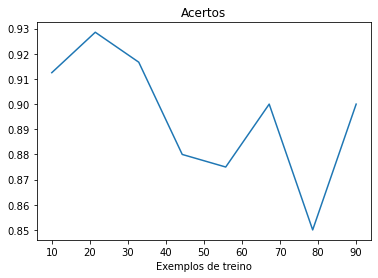

In [56]:
def eval_model(epochs):
    y1=[];y2=[]
    x=np.linspace(10,90,8)
    for i in range(1,9):
        Input,Output,Input_test,Output_test=gen_dataset(i)
        reset_weight()
        #torch.manual_seed(50)
        #model = Autoencoder()
        #PATH_load='state_0_model.pt'
        #model.load_state_dict(torch.load(PATH_load))
        treine(epochs)
        erro,acerto = Eval_metric('test')
        y1.append(erro)
        y2.append(acerto)
    plt.plot(x,y2)
    plt.xlabel('Exemplos de treino')
    plt.title('Acertos')
    plt.show()
eval_model(100)
    


* Label = 0 (primeira parte do gráfico)
* Label = 1 (segunda parte do gráfico)
* Se a resposta for 0 quer dizer que a rede acha que o gráfico que foi apresentado é um gráfico do inicio.
* Se a resposta for 1, a rede acha que é da segunda parte.


* __Small data neural networks__

https://www.ictp.it/about-ictp/media-centre/news/2021/11/tinyml.aspx#close
* __calcular a porcentagem de erro__

* __separar o dataset em 1/4 de inicio e 1/4 de  final.__




In [38]:
eval_model(20)

(10, 30)
(10,)
(80, 30)
(80,)
Input_Train torch.Size([1, 10, 30])
Train_Labels torch.Size([1, 10, 1])
Input_test torch.Size([8, 10, 30])
test_Labels torch.Size([8, 10, 1])
Epoch:1,Loss:0.0845
Epoch:2,Loss:0.0564
Epoch:3,Loss:0.0077
Epoch:4,Loss:0.0066
Epoch:5,Loss:0.0149
Epoch:6,Loss:0.0312
Epoch:7,Loss:0.0245
Epoch:8,Loss:0.0060
Epoch:9,Loss:0.0017
Epoch:10,Loss:0.0031
Epoch:11,Loss:0.0051
Epoch:12,Loss:0.0065
Epoch:13,Loss:0.0067
Epoch:14,Loss:0.0057
Epoch:15,Loss:0.0054
Epoch:16,Loss:0.0029
Epoch:17,Loss:0.0005
Epoch:18,Loss:0.0002
Epoch:19,Loss:0.0010
Epoch:20,Loss:0.0021
erro =  0.55
acerto =  0.45
(20, 30)
(20,)
(70, 30)
(70,)
Input_Train torch.Size([2, 10, 30])
Train_Labels torch.Size([2, 10, 1])
Input_test torch.Size([7, 10, 30])
test_Labels torch.Size([7, 10, 1])
Epoch:1,Loss:0.0373
Epoch:2,Loss:0.0230
Epoch:3,Loss:0.0119
Epoch:4,Loss:0.0055
Epoch:5,Loss:0.0028
Epoch:6,Loss:0.0037
Epoch:7,Loss:0.0043
Epoch:8,Loss:0.0029
Epoch:9,Loss:0.0017
Epoch:10,Loss:0.0021
Epoch:11,Loss:0.

KeyboardInterrupt: 

In [21]:
def eval_model(epochs_i,epochs_f):
    y1=[];y2=[];epochs=[]
    x=np.linspace(0,5,5)
    for epoch in range(epochs_i,epochs_f,20):
        Input,Output,Input_test,Output_test=gen_dataset(5)
        model = Autoencoder()
        PATH_load='state_0_model.pt'
        model.load_state_dict(torch.load(PATH_load))
        treine(epoch)
        epochs.append(epoch)
        erro,acerto = Eval_metric('test')
        size = np.shape(Input_test)[0]*np.shape(Input_test)[1]
        print(size)
        #s.exit()
        y1.append(erro/size)
        y2.append(acerto/size)
    return y1,y2,epochs
    
y1,y2,epochs = eval_model(20,100)

(50, 30)
(50,)
(40, 30)
(40,)
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])
Epoch:1,Loss:0.0268
Epoch:2,Loss:0.0619
Epoch:3,Loss:0.0328
Epoch:4,Loss:0.0525
Epoch:5,Loss:0.0219
Epoch:6,Loss:0.0536
Epoch:7,Loss:0.0212
Epoch:8,Loss:0.0385
Epoch:9,Loss:0.0294
Epoch:10,Loss:0.0254
Epoch:11,Loss:0.0344
Epoch:12,Loss:0.0228
Epoch:13,Loss:0.0263
Epoch:14,Loss:0.0290
Epoch:15,Loss:0.0222
Epoch:16,Loss:0.0238
Epoch:17,Loss:0.0257
Epoch:18,Loss:0.0214
Epoch:19,Loss:0.0226
Epoch:20,Loss:0.0242
erro =  0.625
acerto =  0.375
40
(50, 30)
(50,)
(40, 30)
(40,)
Input_Train torch.Size([5, 10, 30])
Train_Labels torch.Size([5, 10, 1])
Input_test torch.Size([4, 10, 30])
test_Labels torch.Size([4, 10, 1])
Epoch:1,Loss:0.0202
Epoch:2,Loss:0.0209
Epoch:3,Loss:0.0225
Epoch:4,Loss:0.0193
Epoch:5,Loss:0.0191
Epoch:6,Loss:0.0214
Epoch:7,Loss:0.0193
Epoch:8,Loss:0.0177
Epoch:9,Loss:0.0180
Epoch:10,Loss:0.0175
Epoch:11,Lo

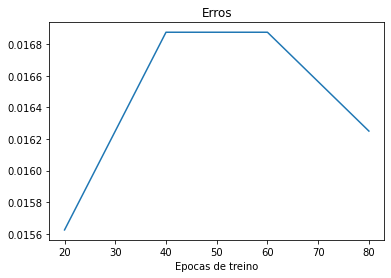

In [22]:
plt.plot(epochs,y1)
plt.xlabel('Epocas de treino')
plt.title('Erros')
plt.show()

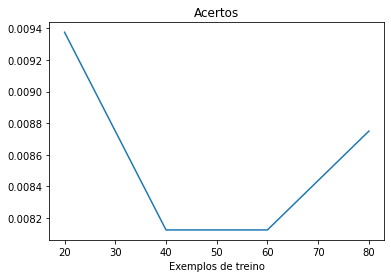

In [23]:
plt.plot(epochs,y2)
plt.xlabel('Exemplos de treino')
plt.title('Acertos')
plt.show()